# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

In [5]:
response = 'AVG_MATH_8_SCORE'

How many years of data are logged in our dataset? 

In [6]:
year = df['YEAR'].value_counts().to_frame().sort_index()
len(year)

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [7]:
AVG_MI = df[df['STATE'] == 'MICHIGAN'][response].mean()
AVG_OH = df[df['STATE'] == 'OHIO'][response].mean()
print(f'Average {response} in Michigan is  {AVG_MI}')
print(f'Average {response} in Ohio is  {AVG_OH}')


Average AVG_MATH_8_SCORE in Michigan is  276.1666666666667
Average AVG_MATH_8_SCORE in Ohio is  282.25


Find the average for your outcome score across all states in 2019

In [8]:
AVG_2019 = df[df['YEAR'] == 2019][response].mean()
print(f"Average {response} in 2019 is {AVG_2019}")

Average AVG_MATH_8_SCORE in 2019 is 281.2641509433962


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [9]:
df.groupby('STATE')[response].max().to_frame().rename(columns={'AVG_MATH_8_SCORE': 'MAX_AVG_MATH_8_SCORE'})

,MAX_AVG_MATH_8_SCORE
STATE,
ALABAMA,269.0
ALASKA,283.0
ARIZONA,283.0
ARKANSAS,279.0
CALIFORNIA,277.0
COLORADO,292.0
CONNECTICUT,289.0
DELAWARE,284.0
DISTRICT_OF_COLUMBIA,269.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [10]:
# Convert the STATE variable to dummy variable for regression
dummies = pd.get_dummies(df['STATE'], prefix='STATE')
df_with_dummies = pd.concat([df, dummies], axis=1)
df_with_dummies.drop('STATE', axis=1, inplace=True)



In [11]:
dummy_cols = [col for col in df_with_dummies.columns if col.startswith('STATE')]
print(dummy_cols)

['STATE_REVENUE', 'STATE_ALABAMA', 'STATE_ALASKA', 'STATE_ARIZONA', 'STATE_ARKANSAS', 'STATE_CALIFORNIA', 'STATE_COLORADO', 'STATE_CONNECTICUT', 'STATE_DELAWARE', 'STATE_DISTRICT_OF_COLUMBIA', 'STATE_DODEA', 'STATE_FLORIDA', 'STATE_GEORGIA', 'STATE_HAWAII', 'STATE_IDAHO', 'STATE_ILLINOIS', 'STATE_INDIANA', 'STATE_IOWA', 'STATE_KANSAS', 'STATE_KENTUCKY', 'STATE_LOUISIANA', 'STATE_MAINE', 'STATE_MARYLAND', 'STATE_MASSACHUSETTS', 'STATE_MICHIGAN', 'STATE_MINNESOTA', 'STATE_MISSISSIPPI', 'STATE_MISSOURI', 'STATE_MONTANA', 'STATE_NATIONAL', 'STATE_NEBRASKA', 'STATE_NEVADA', 'STATE_NEW_HAMPSHIRE', 'STATE_NEW_JERSEY', 'STATE_NEW_MEXICO', 'STATE_NEW_YORK', 'STATE_NORTH_CAROLINA', 'STATE_NORTH_DAKOTA', 'STATE_OHIO', 'STATE_OKLAHOMA', 'STATE_OREGON', 'STATE_PENNSYLVANIA', 'STATE_RHODE_ISLAND', 'STATE_SOUTH_CAROLINA', 'STATE_SOUTH_DAKOTA', 'STATE_TENNESSEE', 'STATE_TEXAS', 'STATE_UTAH', 'STATE_VERMONT', 'STATE_VIRGINIA', 'STATE_WASHINGTON', 'STATE_WEST_VIRGINIA', 'STATE_WISCONSIN', 'STATE_WYOMING

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Correlation coefficient: 0.9104085921198478


<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='AVG_MATH_8_SCORE'>

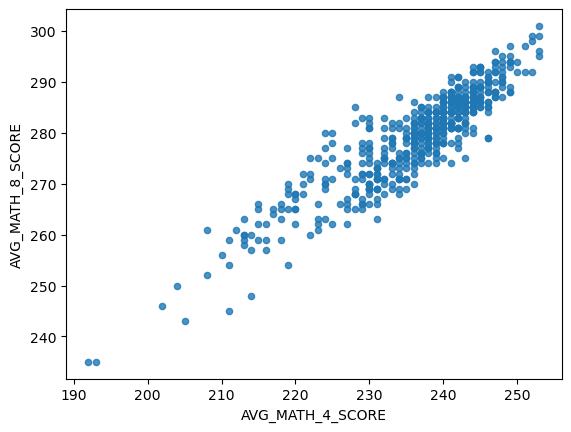

In [13]:
correlation_coefficient = df['AVG_MATH_4_SCORE'].corr(df['AVG_MATH_8_SCORE'])
print(f"Correlation coefficient: {correlation_coefficient}")
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)

**<CAPTION FOR VIZ 1>**

**Visualization 2**

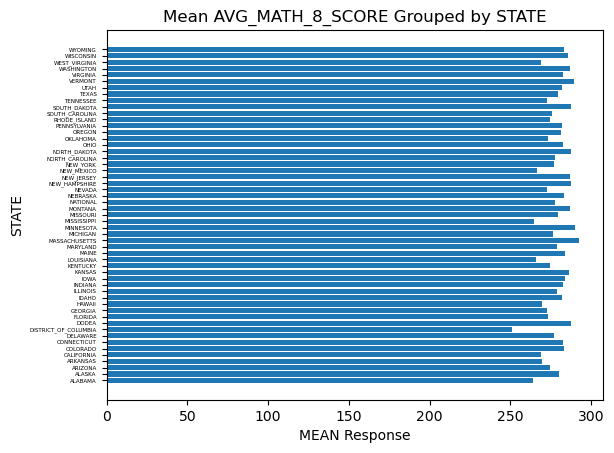

In [64]:
grouped_mean = df.groupby('STATE')[response].mean().reset_index()

# Create a bar plot
plt.barh(grouped_mean['STATE'],grouped_mean[response])
plt.yticks(fontsize=4)
plt.xlabel('MEAN Response')
plt.ylabel('STATE')
plt.title('Mean AVG_MATH_8_SCORE Grouped by STATE')
plt.show()

/var/folders/nd/dt99ddkn17b3q7m8d1jnqql00000gn/T/ipykernel_3311/1652708208.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[response], kde=False, fit=stats.johnsonsu)


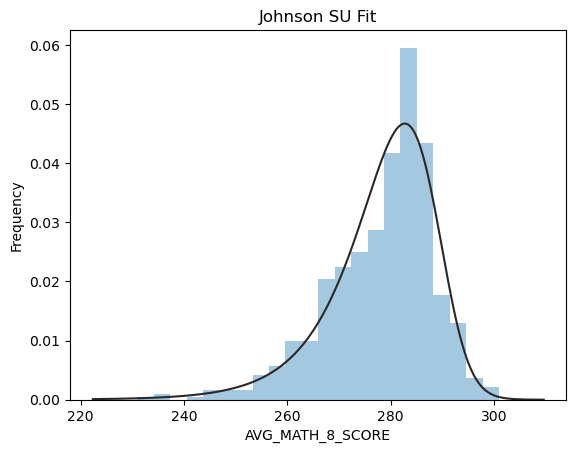

In [29]:
#df.plot.hist(df[response], bins=30, density=True, alpha=0.6, color='g')
#plt.hist(df[response], bins=30, density=True, alpha=0.6, color='g')
sns.distplot(df[response], kde=False, fit=stats.johnsonsu)
plt.title('Johnson SU Fit')
plt.xlabel('AVG_MATH_8_SCORE')
plt.ylabel('Frequency')
plt.show()

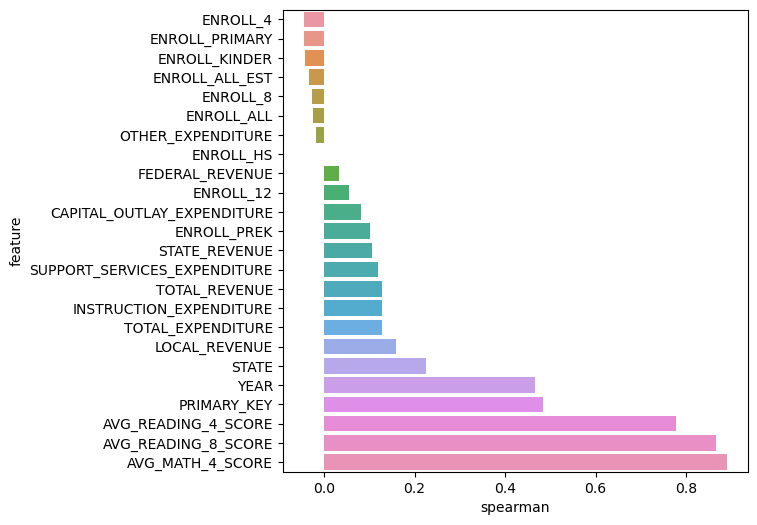

In [65]:
col_names = df.columns.to_list()
col_names.remove(response)

def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame[response], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

spearman(df,col_names)

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
features = ['AVG_MATH_4_SCORE','AVG_READING_8_SCORE','AVG_READING_4_SCORE'] + dummy_cols
X = df_with_dummies[features].dropna()
y = y = df.loc[X.index][response]
y.fillna(y.median(), inplace=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [17]:
# import your sklearn class here
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [18]:
# create your model here
model =  make_pipeline(RobustScaler(), LassoCV(max_iter=10000000, random_state=42))

In [19]:
model.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lassocv', LassoCV(max_iter=10000000, random_state=42))])

In [20]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [23]:
from sklearn.metrics import mean_squared_error
print(f"Model Score: {model.score(X_test, y_test)}")
mse = mean_squared_error(y_test, model.predict(X_test))
print(f"Mean Squared Error: {mse}")
mean_response = df[response].mean()
print(f"Mean of Response variable: {mean_response}")

Model Score: 0.9365948120994079
Mean Squared Error: 4.099174752026936
Mean of Response variable: 278.28073089700996


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

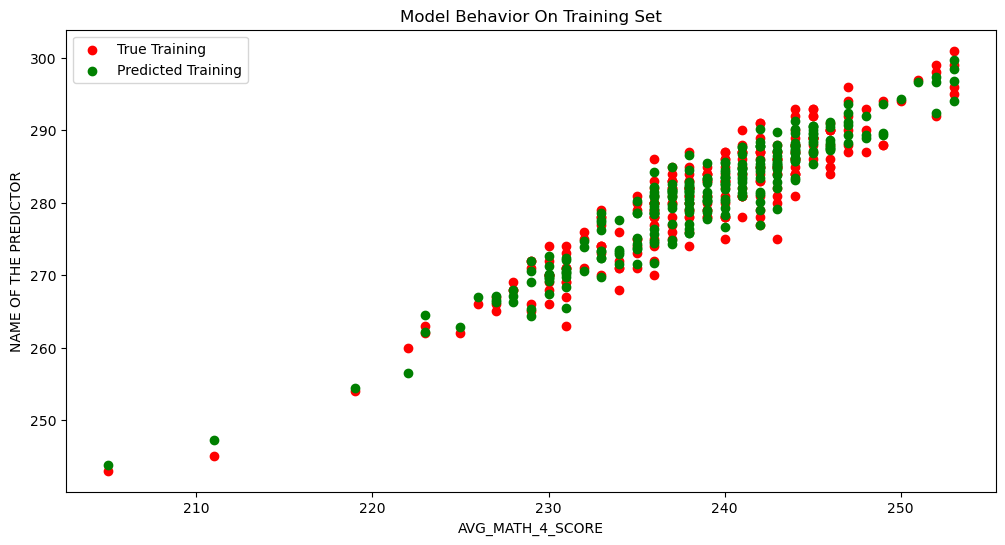

In [24]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

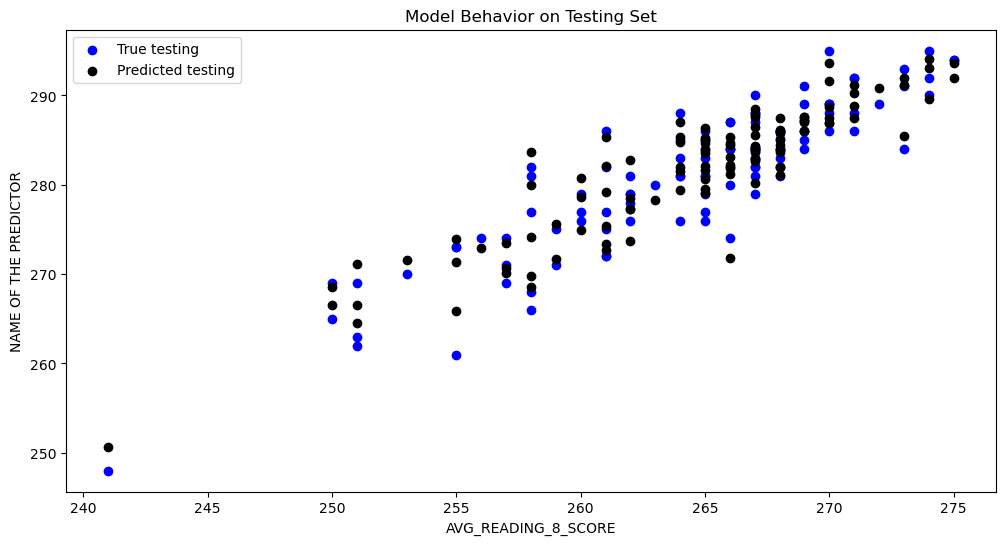

In [25]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

I initially examined the data using Spearman correlation and discovered that the variables AVG_MATH_4_SCORE, AVG_READING_8_SCORE, and AVG_READING_4_SCORE exhibit strong correlations with my target variable. Interestingly, the categorical variable 'STATE' also shows some degree of correlation. To prepare this variable for inclusion in a regression model, I transformed it into dummy variables. Given the high dimensionality introduced by these dummy variables, I employed LASSO regression. This approach offers the dual benefits of feature selection and overfitting prevention. The model yielded a score of 0.937, indicative of substantial predictive accuracy. Furthermore, the Mean Squared Error (MSE) of approximately 4.1 is quite satisfactory, especially when considering that the mean value of the dependent variable exceeds 200.